## Image Classification

**1. BUILDING A DATA PIPELINE**

**1.1 INSTALLING DEPENDENCIES**

In [1]:
import tensorflow as tf
import os #Can go and scan through folders and files
%pip install opencv-python

/Users/Shriram/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Note: you may need to restart the kernel to use updated packages.


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

**1.2 REMOVE DODGY IMAGES**

In [3]:
import cv2      #OpenCV Library
import imghdr   #Returns type of Image
import matplotlib.pyplot as plt

In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [6]:
os.listdir(data_dir)

['happy', 'sad']

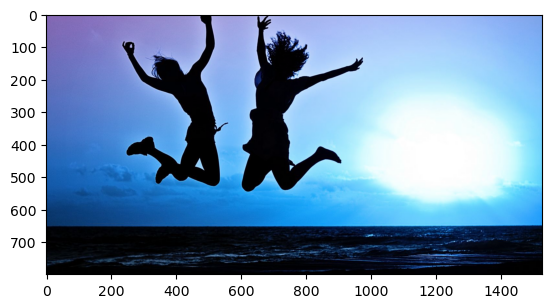

In [7]:
img = cv2.imread(os.path.join('data', 'happy', '_happy_jumping_on_beach-40815.jpg'))
img.shape
plt.imshow(img)
plt.show()

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image does not exist in Image extensions list {}'. format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with Image {}'.format(image_path))
            os.remove(image_path)

**1.3 LOAD DATA**

In [9]:
import numpy as np

In [10]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data

Found 170 files belonging to 2 classes.


2023-05-24 21:14:38.074349: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [22]:
batch = data_iterator.next()

In [23]:
batch[1]

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [24]:
batch[0].shape

(32, 256, 256, 3)

**2. PREPROCESS DATA**

**2.1 SCALE DATA**

In [26]:
data = data.map(lambda x,y: (x/255, y))

In [27]:
scaled_iterator = data.as_numpy_iterator()

In [28]:
batch = scaled_iterator.next()

**2.2 SPLIT DATA**

In [29]:
len(data)

6

In [35]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1) + 1

In [39]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)